In [98]:
import pandas as pd
import numpy as np
import json
from sklearn.metrics.pairwise import cosine_similarity
import datetime
import seaborn as sns

import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

from surprise import SVD,Reader, Dataset 
from surprise.model_selection import cross_validate

In [2]:
from google.colab import files
uploaded1=files.upload()

Saving DNC_products_dataset.csv to DNC_products_dataset.csv


In [90]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 6.3 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619410 sha256=5e68c74bd583129759cbf31fdc73db78401e29bc764f7d6b29a898366b710be1
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [3]:
from google.colab import files
uploaded2=files.upload()

Saving DNC_orders_dataset.csv to DNC_orders_dataset.csv


In [4]:
from google.colab import files
uploaded3=files.upload()

Saving DNC_order_reviews_dataset.csv to DNC_order_reviews_dataset.csv


In [5]:
from google.colab import files
uploaded4=files.upload()

Saving DNC_order_items_dataset.csv to DNC_order_items_dataset.csv


In [9]:
df1=pd.read_csv('DNC_products_dataset.csv')
df2=pd.read_csv('DNC_orders_dataset.csv')
df3=pd.read_csv('DNC_order_reviews_dataset.csv')
df4=pd.read_csv('DNC_order_items_dataset.csv')


In [7]:
df1.head()

,Unnamed: 0,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,625.0,20.0,17.0,13.0


In [10]:
df2.head()

,Unnamed: 0,order_id,customer_id,order_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered


In [11]:
df3.head()

,Unnamed: 0,review_id,order_id,review_score
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [12]:
df4.head()

,Unnamed: 0,order_id,order_item_id,product_id,price
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


In [34]:
df_merge=df3.merge(df4, how='right',on='order_id')

In [35]:
df_merge.head()

,Unnamed: 0_x,review_id,order_id,review_score,Unnamed: 0_y,order_item_id,product_id,price
0,51963.0,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5.0,0,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,27823.0,7b07bacd811c4117b742569b04ce3580,00018f77f2f0320c557190d7a144bdd3,4.0,1,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,4218.0,0c5b33dea94867d1ac402749e5438e8b,000229ec398224ef6ca0657da4fc703e,5.0,2,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,38844.0,f4028d019cb58564807486a6aaf33817,00024acbcdf0a6daa1e931b038114c75,4.0,3,1,7634da152a4610f1595efa32f14722fc,12.99
4,55676.0,940144190dcba6351888cafa43f3a3a5,00042b26cf59d7ce69dfabb4e55b4fd9,5.0,4,1,ac6c3623068f30de03045865e4e10089,199.90


In [36]:
df_merge.shape

(113314, 8)

In [41]:
popular_products = pd.DataFrame(df_merge.groupby('product_id')['review_score'].count())
most_popular = popular_products.sort_values('review_score', ascending=False)
most_popular.head(10)

,review_score
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,524
422879e10f46682990de24d770e7f83d,486
99a4788cb24856965c36a24e339b6058,482
389d119b48cf3043d311335e499d9c6b,391
368c6c730842d78016ad823897a372db,388
53759a2ecddad2bb87a079a1f1519f73,373
d1c427060a0f73f6b889a5c7c61f2ac4,340
53b36df67ebb7c41585e8d54d6772e08,320
154e7e31ebfa092203795c972e5804a6,292


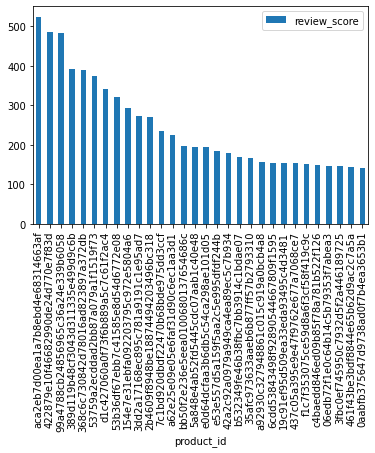

In [42]:
most_popular.head(30).plot(kind = "bar")

In [51]:
df_merge2=df_merge.merge(df1, how='inner',on='product_id')

In [52]:
df_merge2.head()

,Unnamed: 0_x,review_id,order_id,review_score,Unnamed: 0_y,order_item_id,product_id,price,Unnamed: 0,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,51963.0,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5.0,0,1,4244733e06e7ecb4970a6e2683c13e61,58.9,25865,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
1,14715.0,b11cba360bbe71410c291b764753d37f,130898c0987d1801452a8ed92a670612,5.0,8346,1,4244733e06e7ecb4970a6e2683c13e61,55.9,25865,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
2,4796.0,af01c4017c5ab46df6cc810e069e654a,532ed5e14e24ae1f0d735b91524b98b9,4.0,36646,1,4244733e06e7ecb4970a6e2683c13e61,64.9,25865,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
3,78465.0,8304ff37d8b16b57086fa283fe0c44f8,6f8c31653edb8c83e1a739408b5ff750,5.0,49108,1,4244733e06e7ecb4970a6e2683c13e61,58.9,25865,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
4,18085.0,426f43a82185969503fb3c86241a9535,7d19f4ef4d04461989632411b7e588b9,5.0,55021,1,4244733e06e7ecb4970a6e2683c13e61,58.9,25865,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0


In [53]:
df_merge2.shape


(113314, 16)

In [57]:
df_merge3=df_merge2.merge(df2, how='inner',on='order_id')

In [58]:
df_merge3.shape

(113314, 19)

In [62]:
df_merge3.head()

,Unnamed: 0_x,review_id,order_id,review_score,Unnamed: 0_y,order_item_id,product_id,price,Unnamed: 0_x,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Unnamed: 0_y,customer_id,order_status
0,51963.0,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5.0,0,1,4244733e06e7ecb4970a6e2683c13e61,58.9,25865,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,85267,3ce436f183e68e07877b285a838db11a,delivered
1,14715.0,b11cba360bbe71410c291b764753d37f,130898c0987d1801452a8ed92a670612,5.0,8346,1,4244733e06e7ecb4970a6e2683c13e61,55.9,25865,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,64197,e6eecc5a77de221464d1c4eaff0a9b64,delivered
2,4796.0,af01c4017c5ab46df6cc810e069e654a,532ed5e14e24ae1f0d735b91524b98b9,4.0,36646,1,4244733e06e7ecb4970a6e2683c13e61,64.9,25865,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,10214,4ef55bf80f711b372afebcb7c715344a,delivered
3,78465.0,8304ff37d8b16b57086fa283fe0c44f8,6f8c31653edb8c83e1a739408b5ff750,5.0,49108,1,4244733e06e7ecb4970a6e2683c13e61,58.9,25865,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,59155,30407a72ad8b3f4df4d15369126b20c9,delivered
4,18085.0,426f43a82185969503fb3c86241a9535,7d19f4ef4d04461989632411b7e588b9,5.0,55021,1,4244733e06e7ecb4970a6e2683c13e61,58.9,25865,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,41473,91a792fef70ecd8cc69d3c7feb3d12da,delivered


In [59]:
DNC_ratings1 = df_merge3.head(10000)

In [63]:
ratings_utility_matrix = DNC_ratings1.pivot_table(values='review_score', index='customer_id', columns='product_id', fill_value=0)
ratings_utility_matrix.head()

product_id,001b72dfd63e9833e8c02742adf472e3,00ffe57f0110d73fd84d162252b2c784,0105b5323d24fc655f73052694dbbb3a,016711f78a6a87696645db0a6a834826,01c666c82f414c762ad21bffa56e8b49,01cf56cd6138b926a4802d16fc304149,01cf7c4cffff8db0a1cbe612bd2d50a4,02475368dfb38934fe55f574024fe1d7,028b3574d7619f191a7345161ae590e4,02ed3b595447e948efc3eac897e4df0e,03bb24d19ea7449ce170e0888d830707,056d012d264624accb7f73d31caee034,059344baebbeaa42fa9f2bbe11b1583e,060f0122cdc8f25db4a0d7359fdae7b0,06edb72f1e0c64b14c5b79353f7abea3,08279c494018541f71443c07d77560f8,08574b074924071f4e201e151b152b4e,09481a6dfe9eb590dc8b265b54dc4c97,09b0d15a8cc9a84e7af7e0225f67dc45,0a23fd10720c5ffc6c7f5e66b0b26ae2,0a57f7d2c983bcf8188589a5fea4a8da,0aabfb375647d9738ad0f7b4ea3653b1,0afbecb15d10af6e2c8e3a682becb22c,0b0172eb0fd18479d29c3bc122c058c2,0b13080e2bf193c4ff096b09e0758c7d,0bcc3eeca39e1064258aa1e932269894,0bdd9a52d192d64770e33ae559512478,0c4a0f8ab44f9acd2d04e7024f9ba362,0c4d0a08f95c7b7dc5dc7402bfdafd4c,0c753fe6a58dfa7a27bda5de76e779c3,0c9452f6a812935c0615faee8bf8646b,0cf41187284d7f099adc8415a743ebbd,0d146484c69d613fe015c0229056b065,0da83a01a5c35fa359ae0553c618d5bd,0e2d365a247d105fefc31b17ab8706d9,0e40b1ed4cfd3da1962ec91913e54ba8,0ea04fc101523a27bb53845d14d7d809,0ec7b6a863e219792bc4d50d3a62a839,0ef37d421045fdf87dba29f9bbfda772,0efe972876d70927f5099b77f387c6c7,...,ef8856db4e302ad33dc4d91e40f7593c,ef92defde845ab8450f9d70c526ef70f,efec0b0b076ce3f164b80145743ebc02,f08b29913c73e394bc8477b1e69f7762,f177554ea93259a5b282f24e33f65ab6,f196248e8b5d060cca414a664ea9a76f,f23c48d81cd6a0c87f5c3b14aac68371,f293514e0176006f3af40d473cf24a1e,f2b67cf6ef88cbc9c2f3e482f558b318,f2c1df0fc307ec60e3321c708c1dcac3,f2e53dd1670f3c376518263b3f71424d,f2e9bb932d99a4a695ebde162fcefc35,f3b5bbdfd20be94cc96583501d2819ce,f3b8bfa5b86249e75e5c0632acc0e82e,f46098048d1a0c30ce1495246b8fd752,f471a2281d25a1dbf3193dd5e969aa0f,f4d18451e6c35980e6898e36dfd6fb55,f6af9afab66b4968cf9c27dcdfc42047,f71a7c95a86564873cd996896b2976f6,f7a17d2c51d9df89a4f1711c4ac17f33,f819f0c84a64f02d3a5606ca95edd272,f8b624d4e475bb8d1bddf1b65c6a64f6,f9259c9e7c0f12c70f7a81409680a5ff,f9d774a1820f792952eea079a40a7c6b,fa11ecd35f999783e96ac500532d9d45,fa28f114992077c601cdb9810c5108a4,fadc89c2a60ff96b18827644074dfd70,fb78b116998a9911245664c7823e1a95,fb7a100ec8c7b34f60cec22b1a9a10e0,fb8e60e1a3c247d3a2e17f6986e71a40,fbb1cfc2810efabf3235eccf4530f4ae,fca62108387e25005784da2f551466a1,fcaab5d7f656094e49fbe4ee3a506658,fcf64c72035fc6f17660bae96c933ffb,fdbd77fe1773263558126c16e0b4b67c,fdc1340be043a0e6807741d687fc1cd4,fe077ec80df6b4ee60bb4498d5ab1962,fe59a1e006df3ac42bf0ceb876d70969,fec85e6c0eab9b4bcddf9ccd917c80bc,ff6caf9340512b8bf6d2a2a6df032cfa
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00066ccbe787a588c52bd5ff404590e3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000e943451fc2788ca6ac98a682f2f49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000fd45d6fedae68fc6676036610f879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
003e45472805afa1ee701d83284fa22b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0054f2f885ca69abcf4935c9506d7851,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
X = ratings_utility_matrix.T
X.head()

customer_id,00066ccbe787a588c52bd5ff404590e3,000e943451fc2788ca6ac98a682f2f49,000fd45d6fedae68fc6676036610f879,003e45472805afa1ee701d83284fa22b,0054f2f885ca69abcf4935c9506d7851,0058ebe2dc136d918dd001968cfa5903,00620f738107803e6c0f6818a7a3b7e3,00624707c8556199de70cac1593e7088,00652f7a6e012d58f58fefd69d1a1ea4,0068a2209e2c7631566539fef4331bf8,00701ade29704fc9aa33a8766b082cb6,0074a15febc9459ab2f999ea0e22c8d6,0078867a1043bd408c6134cf5ca1bbf5,007a444502902587d7aa72af38cbd1de,0093eadfb5536c158311672bdf418044,0098400373e087d3c231fb5d37834fde,00a860aeb15fb205efdb0c689d8f9c6a,00acc750f0c2bda99b95c4043ff1e662,00af1761df71da362764c51bb96f5118,00b2b9682f5c2a1f7cf1312ce6a0ea9d,00b366712a38454d2e62c9d2509d0623,00b5072ef1192bc4d02e1d6264317bb0,00b694184c8c2f2a565e4def5a00b8ee,00d4c7cec24152e73f88312fdbf09ffa,00d59ed5b36bbeac2deb4e7256a39fb4,00d9314fb3f147133d0dae548abab307,00da45766aa7d360508cf25434334a8d,00e7c7983371f6e0c6ce890040d431db,00f3b3a7cd0b6566435090c7fbda03a2,00fd2c64e6e3f94a81541196fc536f4f,0116b6f7b023ad7b078ead9dc8f68897,011a899e735ec86f00f26089cdae09cf,01206a881130146c337962e714f06d66,0120f40c1cfb22b538c7f78c8b5265dd,0126e712caf48d6cf32ffbdce563d2c3,012938ae26ceaa758b735826636366f8,0131193f8b1b149f85f1326ac337effb,013e5c6a0f2d8fef75ebb90f05b0ca59,0140bb3a2e24b8dd7a341eaf707b440e,0148732a691a6f017cca48bbffdb172f,...,fefb72a9cc34f58bb01edfefee3bdea1,fefbd500a315bb3290af290fdaf5253c,ff0da136fbd35fb34d88d49e88dbff2a,ff1acf503bdf96c225e4dc499dac6954,ff1c9d04b609c1f86948a391c16e586b,ff319a4ce17236c6a104237b7970f479,ff33ddf6fafd5d38aaa6c0f7385e418f,ff349ea42c06633992fc3c94c3da0f58,ff4229765dfb3bec46909cd5856eaf48,ff46b4411cd7dd62403e3d6df6ea8059,ff46d91a9635a0e6f8108d75516a759c,ff4b5d3b660b635bcbdb988ca60eafbe,ff4ead15d934b5b5896ca73904d07f66,ff50bfb526a535449073de25d8703718,ff5ca282b802097cc7182d5f4b58d199,ff63f83bb3b2dc9a2df626cefbddda8b,ff774d667d8f3f8fe0bdd578e8d0a85f,ff792fe1772fd36b73b4ef17a42f7e6c,ff83b1b9ffb0f2f60273867bb26f671e,ff869205a42a4de9aa4a4bc357c62507,ff898eb678319bd6f600449bb0713f87,ff8b10ae20558c8201652e505e41b0fb,ff8d16a27756dee8602746a20cf0cf8a,ff8f6d3e8686235229636f5b388e3b44,ff8fa0e333a5b7b5362e76311b4ae90a,ffa8532faa3bdc63c11d3124b78022ca,ffb4dbe856e39f4c88fd2abdd505436a,ffb5eaca500a57b7dd52256fcfc82e12,ffbcf1eb664ce45bed8883fbcbdc2b06,ffbda9243760f2492df6e71c590e070a,ffc5e5000221495c2cbb2b099aaec969,ffca23943c4b620ea24812018373fa3f,ffcbcec4480d074ffd50398e66bff27c,ffd940dedc35e4f459eddfa41291e824,ffdaaad4323306777060ca43b3f87e7f,ffdd80d8f3655192a9d2a38d5b18732c,ffed5d4f6245fe13cd57054621eec36a,ffef8c44b23871ffd6a1df761bd61783,fff5169e583fd07fac9fec88962f189d,fff55ba8dffa552b6fdfd86c2e806459
product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
001b72dfd63e9833e8c02742adf472e3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00ffe57f0110d73fd84d162252b2c784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0105b5323d24fc655f73052694dbbb3a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
016711f78a6a87696645db0a6a834826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [65]:
X1 = X

In [67]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(592, 10)

In [68]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(592, 592)

In [69]:
X.index[99]

'27c0cea4dc76549f5bd124d9cad0ae3b'

In [70]:
i = "27c0cea4dc76549f5bd124d9cad0ae3b"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [71]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(592,)

In [72]:
Recommend = list(X.index[correlation_product_ID > 0.90])

Recommend.remove(i) 

Recommend[0:9]

['09b0d15a8cc9a84e7af7e0225f67dc45',
 '0b13080e2bf193c4ff096b09e0758c7d',
 '368c6c730842d78016ad823897a372db',
 '8273821fd2a32fbbc77ad8b743b2a1b9',
 '96f8ecb5e5705b3b726d7e3022622575',
 'a39cc58c1b5926b6f9f378daa89f1315',
 'a62e25e09e05e6faf31d90c6ec1aa3d1',
 'be0a8cb3c50011daec32f4d8ecdccb28',
 'cec09725da5ed01471d9a505e7389d37']

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [129]:
product_descriptions = df_merge3.dropna()
product_descriptions.shape
product_descriptions.head()

,Unnamed: 0_x,review_id,order_id,review_score,Unnamed: 0_y,order_item_id,product_id,price,Unnamed: 0_x,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Unnamed: 0_y,customer_id,order_status
0,51963.0,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5.0,0,1,4244733e06e7ecb4970a6e2683c13e61,58.9,25865,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,85267,3ce436f183e68e07877b285a838db11a,delivered
1,14715.0,b11cba360bbe71410c291b764753d37f,130898c0987d1801452a8ed92a670612,5.0,8346,1,4244733e06e7ecb4970a6e2683c13e61,55.9,25865,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,64197,e6eecc5a77de221464d1c4eaff0a9b64,delivered
2,4796.0,af01c4017c5ab46df6cc810e069e654a,532ed5e14e24ae1f0d735b91524b98b9,4.0,36646,1,4244733e06e7ecb4970a6e2683c13e61,64.9,25865,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,10214,4ef55bf80f711b372afebcb7c715344a,delivered
3,78465.0,8304ff37d8b16b57086fa283fe0c44f8,6f8c31653edb8c83e1a739408b5ff750,5.0,49108,1,4244733e06e7ecb4970a6e2683c13e61,58.9,25865,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,59155,30407a72ad8b3f4df4d15369126b20c9,delivered
4,18085.0,426f43a82185969503fb3c86241a9535,7d19f4ef4d04461989632411b7e588b9,5.0,55021,1,4244733e06e7ecb4970a6e2683c13e61,58.9,25865,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,41473,91a792fef70ecd8cc69d3c7feb3d12da,delivered


In [127]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_category_name"].head(10)

0    cool_stuff
1    cool_stuff
2    cool_stuff
3    cool_stuff
4    cool_stuff
5    cool_stuff
6    cool_stuff
7    cool_stuff
8    cool_stuff
9    cool_stuff
Name: product_category_name, dtype: object

In [78]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_category_name"])
X1

<500x49 sparse matrix of type '<class 'numpy.float64'>'
	with 500 stored elements in Compressed Sparse Row format>

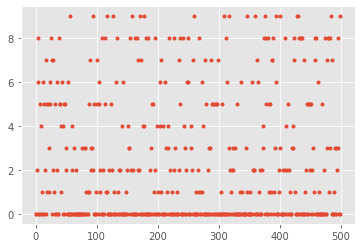

In [79]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [80]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [81]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 informatica_acessorios
 bebes
 relogios_presentes
 perfumaria
 cool_stuff
 papelaria
 ferramentas_jardim
 malas_acessorios
 consoles_games
 pet_shop
Cluster 1:
 cama_mesa_banho
 utilidades_domesticas
 construcao_ferramentas_construcao
 eletroportateis
 eletronicos
 eletrodomesticos_2
 eletrodomesticos
 cool_stuff
 construcao_ferramentas_seguranca
 construcao_ferramentas_jardim
Cluster 2:
 esporte_lazer
 fashion_bolsas_e_acessorios
 eletroportateis
 eletronicos
 eletrodomesticos_2
 eletrodomesticos
 cool_stuff
 construcao_ferramentas_seguranca
 construcao_ferramentas_jardim
 construcao_ferramentas_iluminacao
Cluster 3:
 moveis_decoracao
 utilidades_domesticas
 consoles_games
 eletroportateis
 eletronicos
 eletrodomesticos_2
 eletrodomesticos
 cool_stuff
 construcao_ferramentas_seguranca
 construcao_ferramentas_jardim
Cluster 4:
 fashion_bolsas_e_acessorios
 utilidades_domesticas
 eletroportateis
 eletronicos
 eletrodomesticos_2
 eletrodomesticos
 cool_

In [82]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [84]:
show_recommendations("eletronicos")

Cluster 0:
 informatica_acessorios
 bebes
 relogios_presentes
 perfumaria
 cool_stuff
 papelaria
 ferramentas_jardim
 malas_acessorios
 consoles_games
 pet_shop
